In [198]:
import os

from keras.datasets import cifar10
from keras.layers import Dense

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
import matplotlib.pyplot as plt

In [199]:
from keras import backend as K
print(K.backend())

tensorflow


In [200]:
inputs = keras.Input(shape=(3072,))
x = Dense(1002, activation='relu')(inputs)
y = Dense(334, activation='relu')(x)
outputs = Dense(10, activation='softmax')(y)

model = keras.Model(inputs=inputs, outputs=outputs, name='cifar10')

In [201]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_49 (Dense)            (None, 1002)              3079146   
                                                                 
 dense_50 (Dense)            (None, 334)               335002    
                                                                 
 dense_51 (Dense)            (None, 10)                3350      
                                                                 
Total params: 3,417,498
Trainable params: 3,417,498
Non-trainable params: 0
_________________________________________________________________


In [202]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 3072).astype("float32") / 255
x_test = x_test.reshape(10000, 3072).astype("float32") / 255

In [203]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [204]:
history = model.fit(x_train, y_train, batch_size=256, epochs=26, validation_split=0.25)

Epoch 1/26
147/147 [==============================] - 2s 10ms/step - loss: 2.0934 - accuracy: 0.2666 - val_loss: 1.8542 - val_accuracy: 0.3416
Epoch 2/26
147/147 [==============================] - 2s 11ms/step - loss: 1.7650 - accuracy: 0.3708 - val_loss: 1.7392 - val_accuracy: 0.3763
Epoch 3/26
147/147 [==============================] - 2s 11ms/step - loss: 1.6744 - accuracy: 0.4011 - val_loss: 1.7090 - val_accuracy: 0.3903
Epoch 4/26
147/147 [==============================] - 2s 10ms/step - loss: 1.6092 - accuracy: 0.4273 - val_loss: 1.6113 - val_accuracy: 0.4309
Epoch 5/26
147/147 [==============================] - 2s 10ms/step - loss: 1.5601 - accuracy: 0.4497 - val_loss: 1.6169 - val_accuracy: 0.4301
Epoch 6/26
147/147 [==============================] - 2s 10ms/step - loss: 1.5240 - accuracy: 0.4553 - val_loss: 1.5495 - val_accuracy: 0.4545
Epoch 7/26
147/147 [==============================] - 2s 10ms/step - loss: 1.4971 - accuracy: 0.4683 - val_loss: 1.5693 - val_accuracy: 0.4470

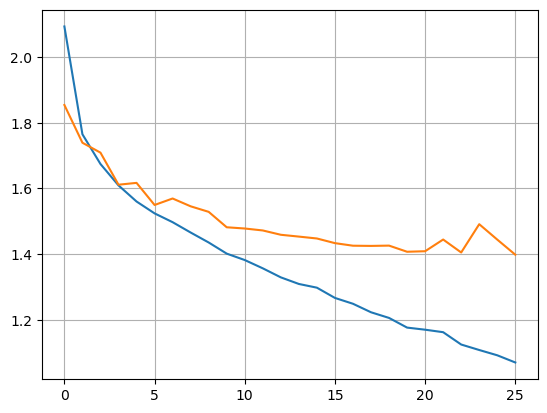

In [205]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [206]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 1.3778 - accuracy: 0.5179 - 456ms/epoch - 1ms/step
Test loss: 1.3778002262115479
Test accuracy: 0.5178999900817871
